In [1]:
# Step 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
# Step 2: Upload your dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('wineqt.csv')
print("✅ Dataset Loaded Successfully")
df.head()


Saving wineqt.csv to wineqt.csv
✅ Dataset Loaded Successfully


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [3]:
# Step 3: Display dataset info
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Missing Values:
 fixed acidity           0
volatile acidity        0


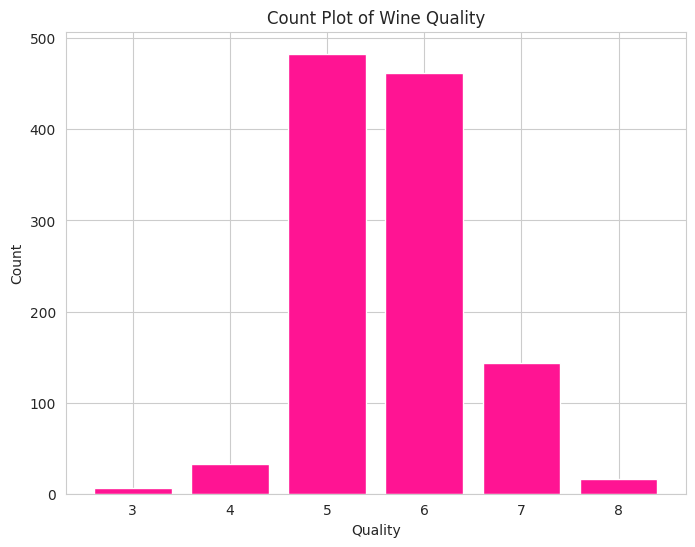

In [4]:
# Step 4: Plot count of wine quality ratings
quality_counts = df['quality'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='deeppink')
plt.title('Count Plot of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()



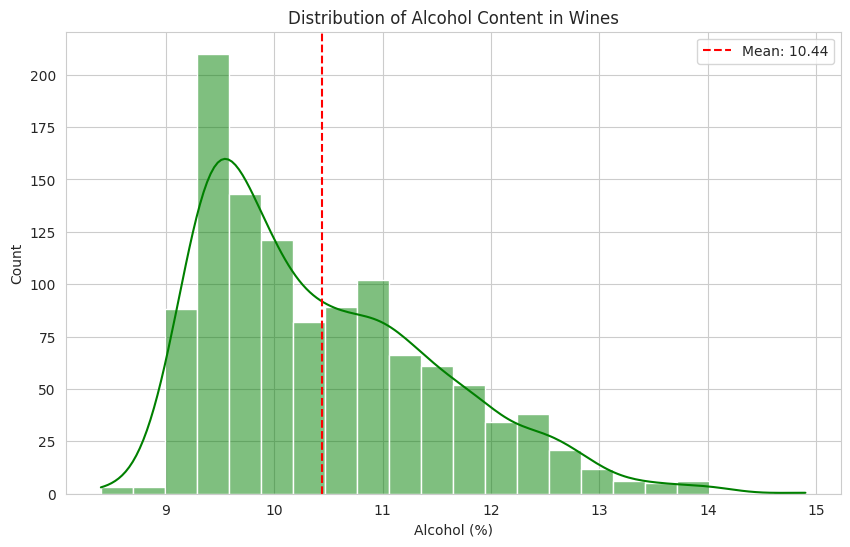

In [6]:
# Step 5: Distribution of alcohol content
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='alcohol', kde=True, color='green')
plt.title('Distribution of Alcohol Content in Wines')
plt.xlabel('Alcohol (%)')
plt.ylabel('Count')
plt.axvline(df['alcohol'].mean(), color='red', linestyle='--', label=f"Mean: {df['alcohol'].mean():.2f}")
plt.legend()
plt.show()

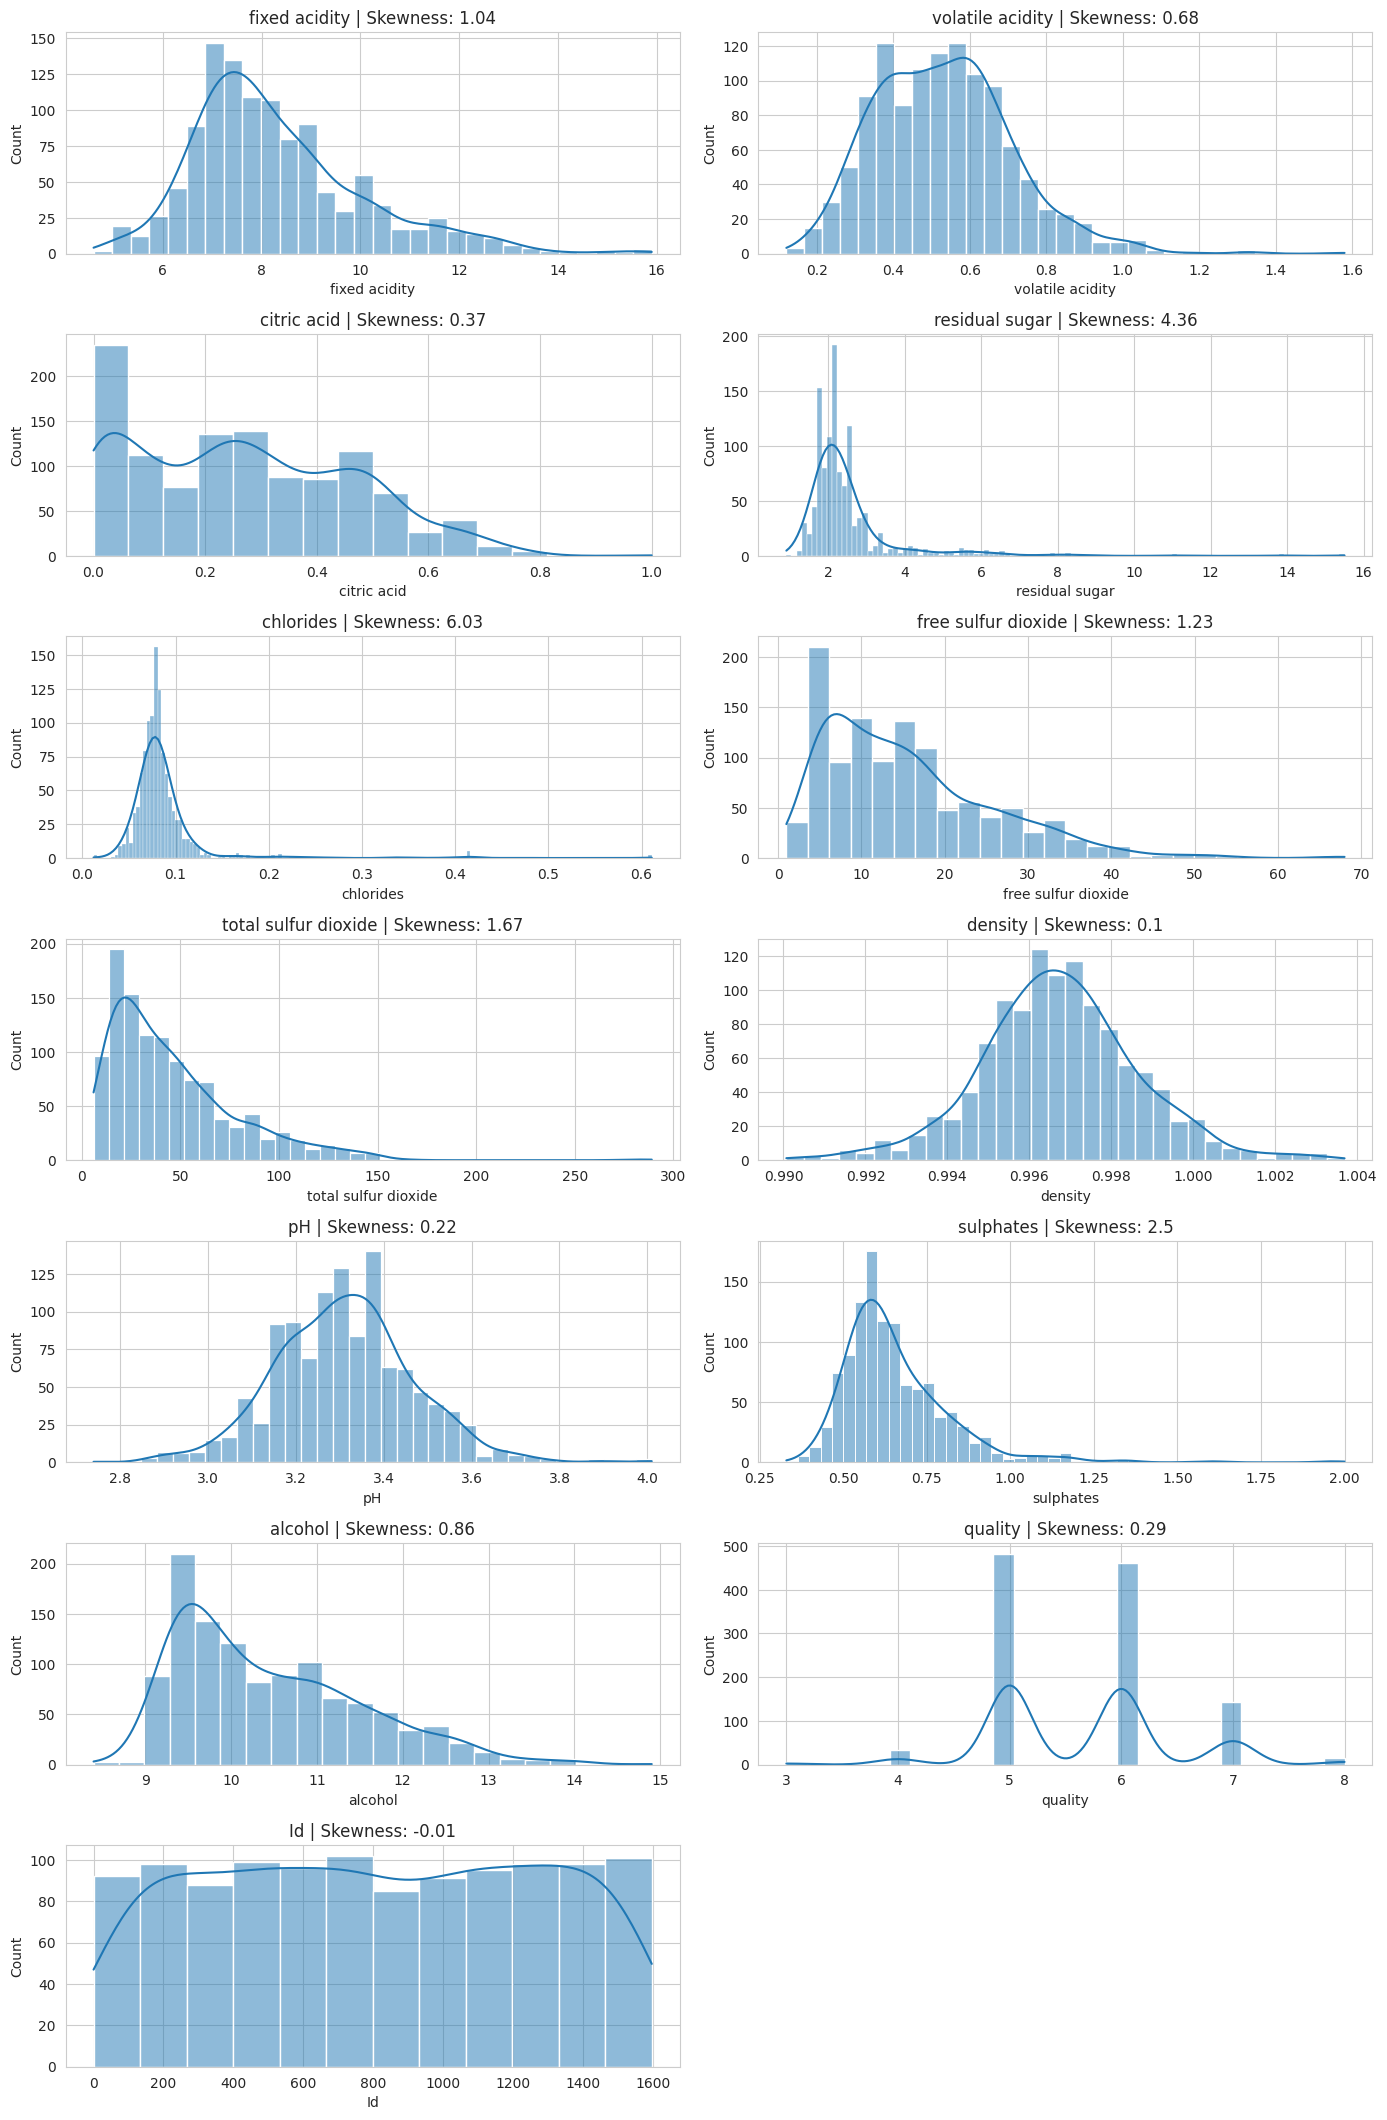

In [7]:
# Step 6: Distribution plots for all numeric features
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1120776228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


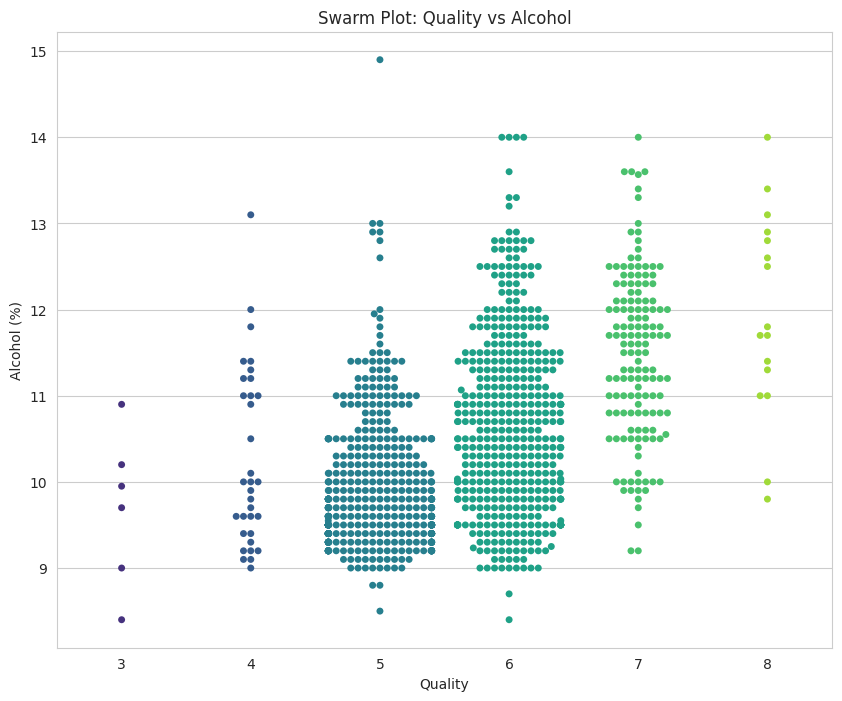

In [8]:
# Step 7: Swarm plot for wine quality vs alcohol
plt.figure(figsize=(10, 8))
sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')
plt.title('Swarm Plot: Quality vs Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol (%)')
plt.show()


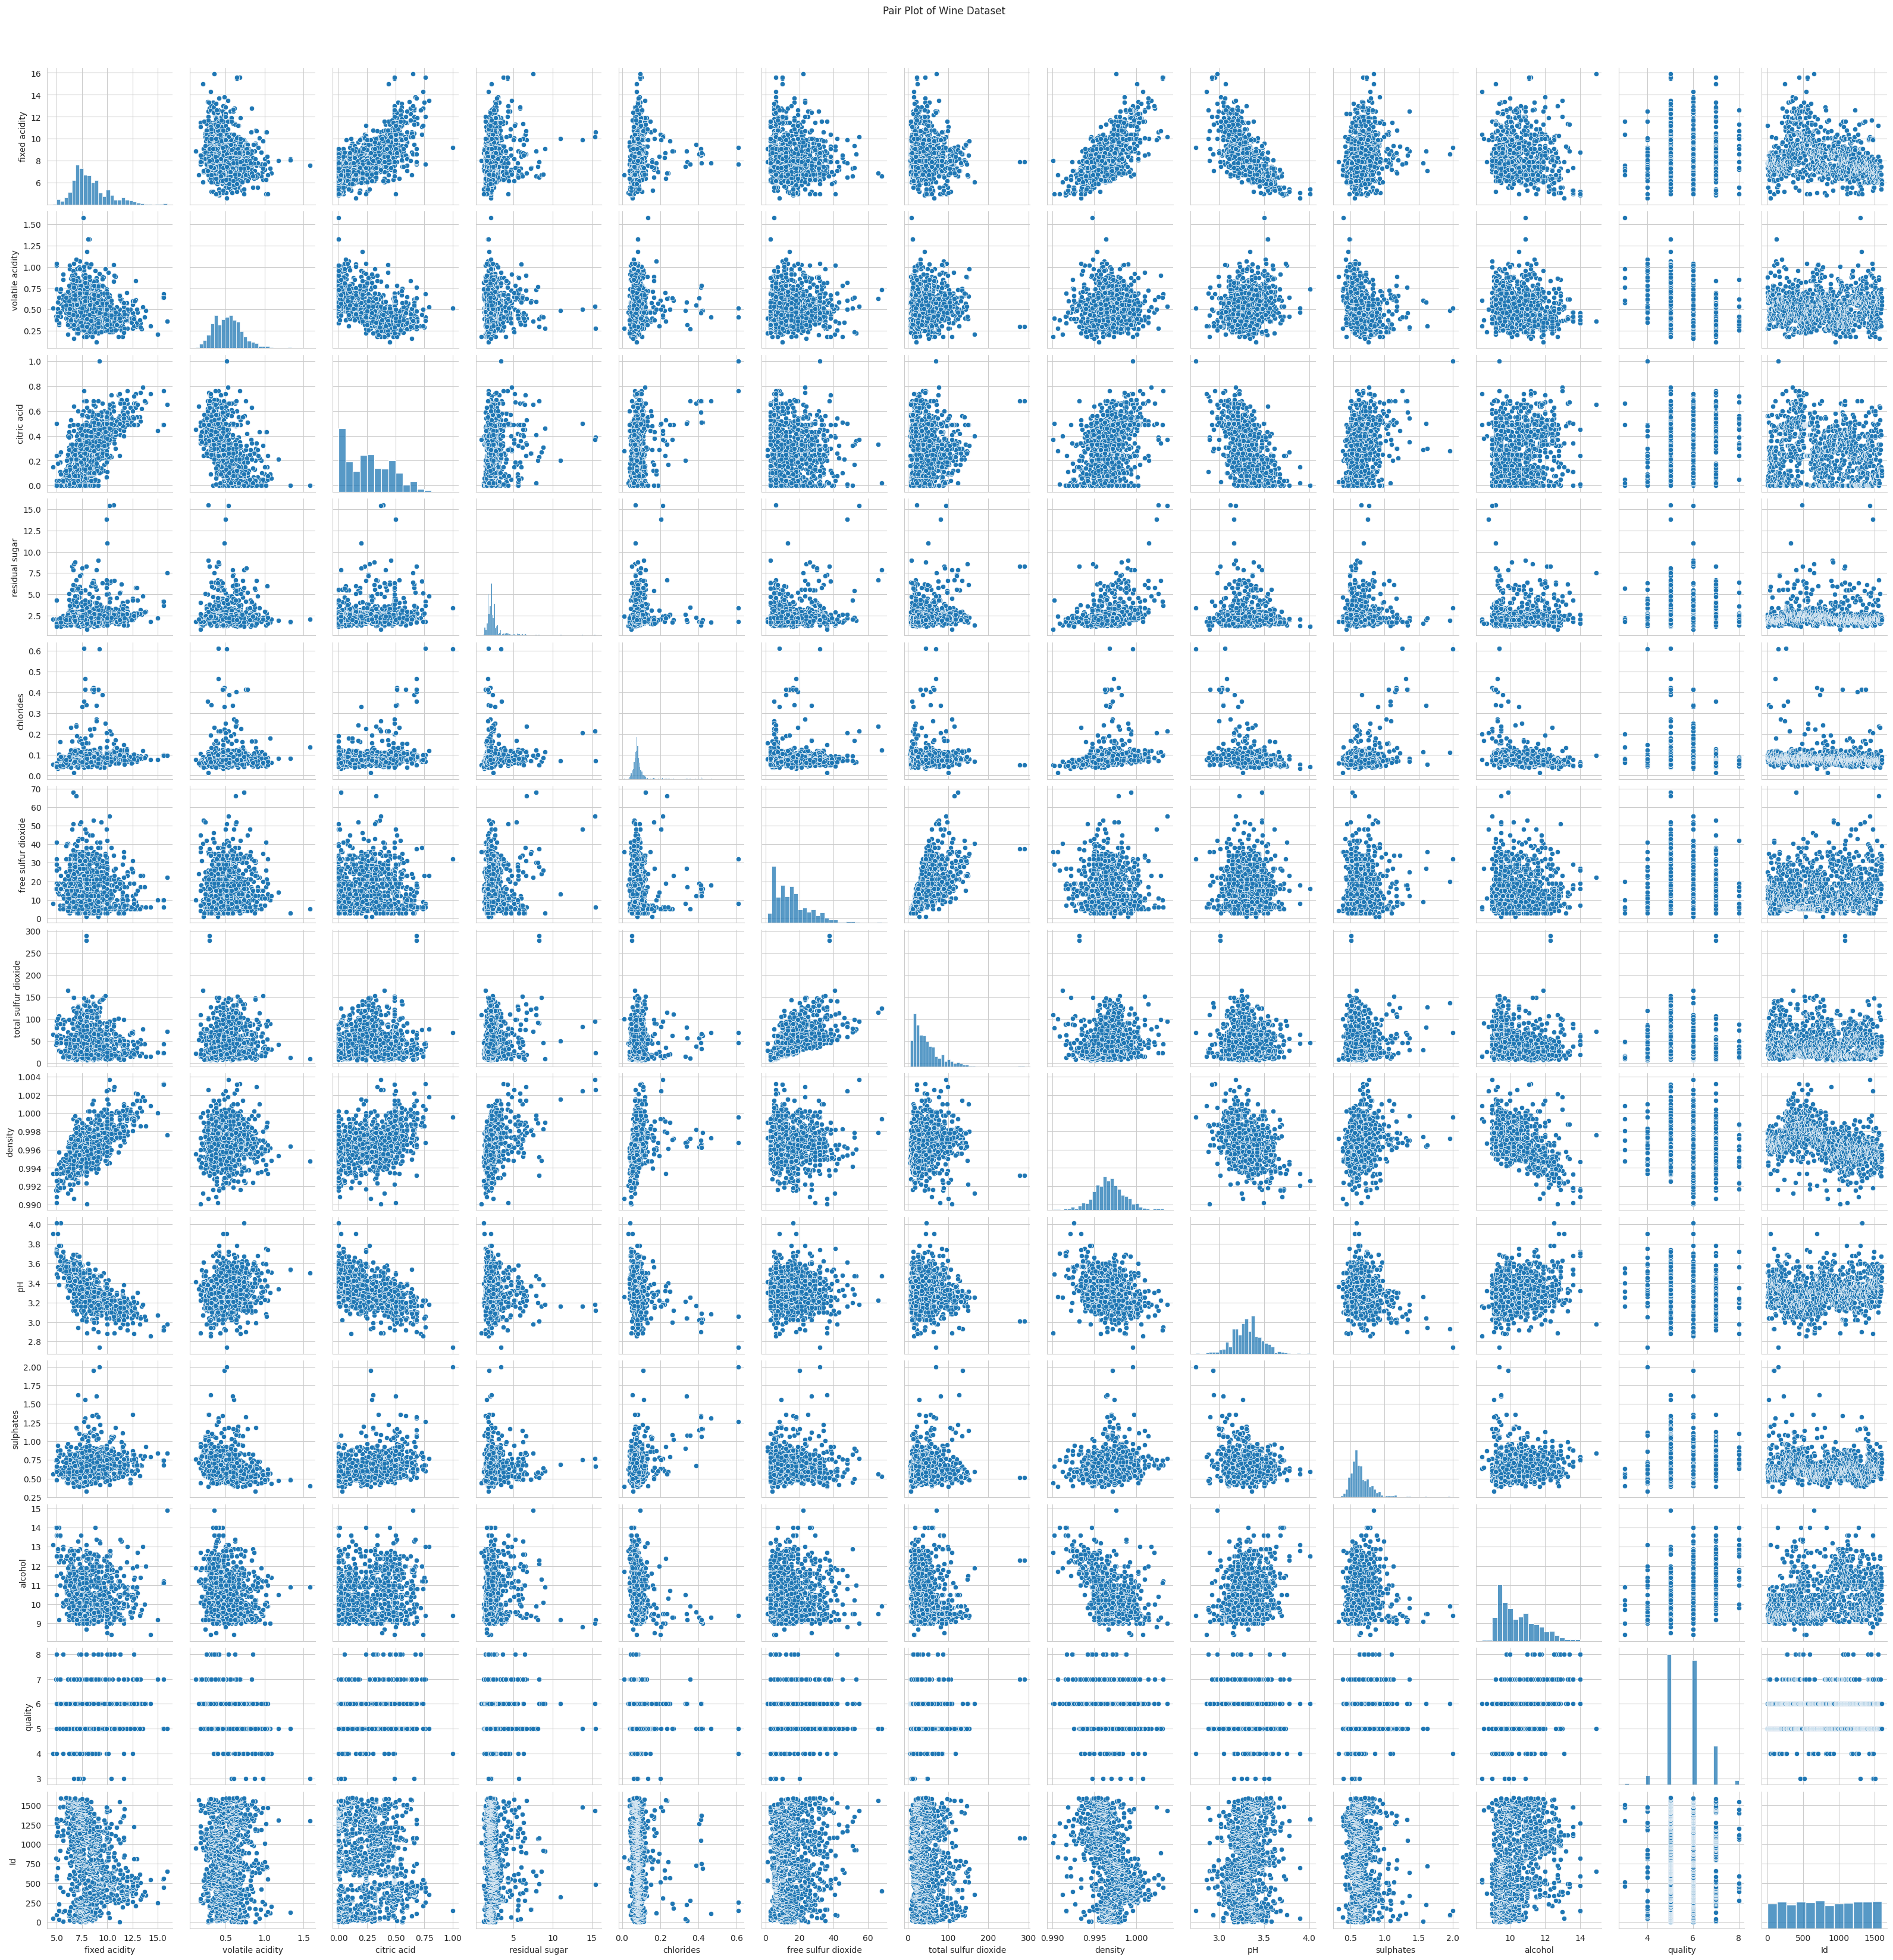

In [9]:
# Step 8: Pair plot to visualize relationships between all features
sns.pairplot(df)
plt.suptitle('Pair Plot of Wine Dataset', y=1.02)
plt.show()


/tmp/ipython-input-2375089043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='Pastel1')


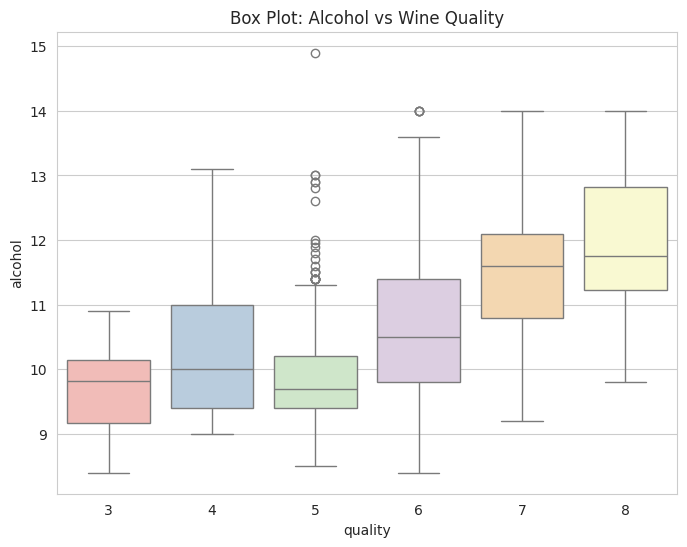

In [10]:
# Step 9: Box plot for alcohol across wine quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Pastel1')
plt.title('Box Plot: Alcohol vs Wine Quality')
plt.show()


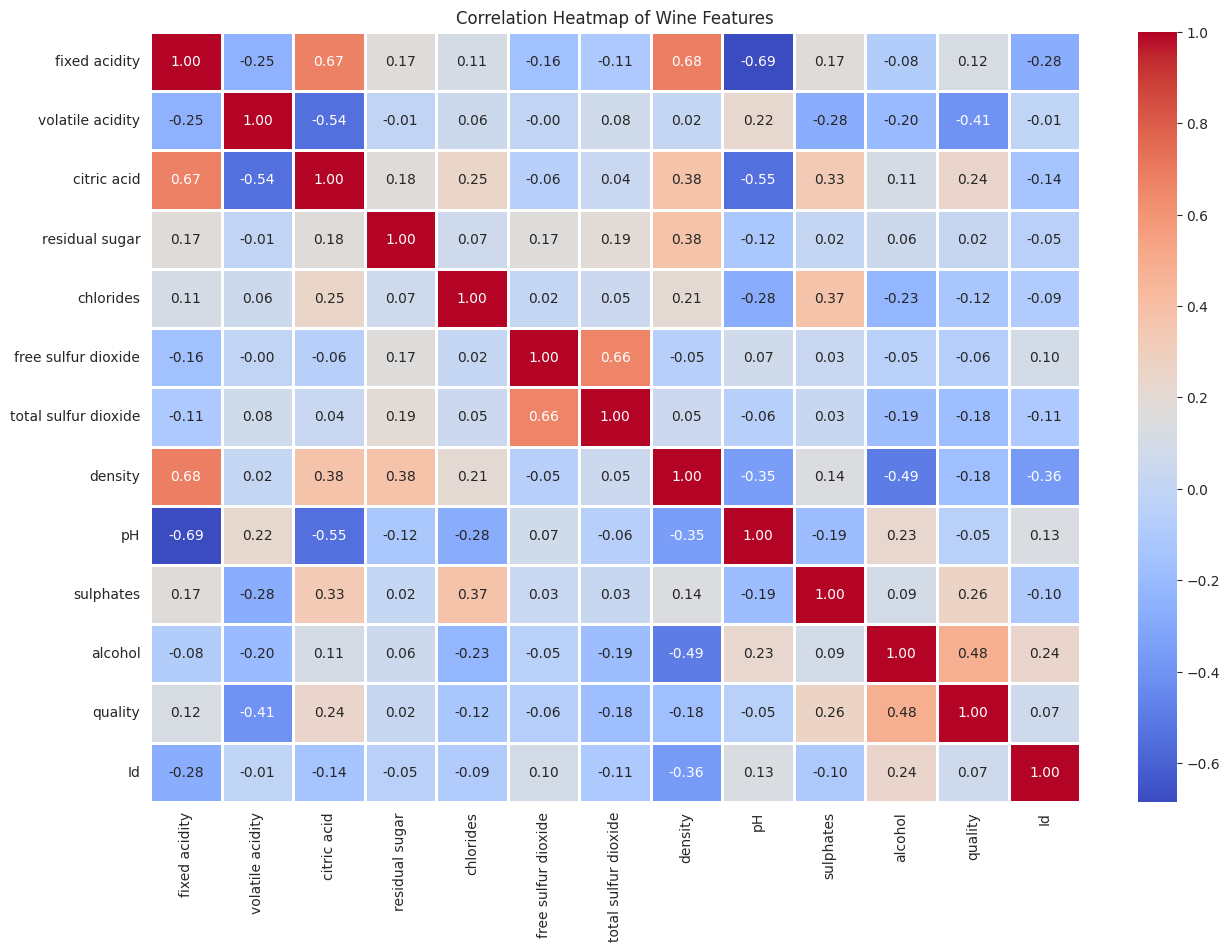

In [11]:
# Step 10: Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap of Wine Features')
plt.show()


## Hyperparameter tuning

### Subtask:
Optimize the Random Forest Classifier model's hyperparameters to further improve performance.


**Reasoning**:
Import the necessary modules for hyperparameter tuning and define the parameter grid for the Random Forest Classifier.



In [17]:
# Step 14: Import necessary modules for hyperparameter tuning and define parameter grid
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Reasoning**:
Instantiate and fit the GridSearchCV object to find the best hyperparameters for the Random Forest Classifier.



In [ ]:
# Step 15: Instantiate and fit GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)